### 포켓몬 페이지에서 이미지를 수집하여 포켓몬 도감 만들기
- 이미지를 다운로드해서 폴더 안에 저장
- 폴더 생성 -> 코드를 통해 진행

In [2]:
# 웹브라우저 "통제"
from selenium import webdriver as wb
# 컴퓨터용 키보드
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from bs4 import BeautifulSoup as bs
# 시간 지연
import time
# 로딩바
from tqdm import tqdm_notebook as tq
# 이미지 주소 파일로 변환해주는 라이브러리
from urllib.request import urlretrieve
# 폴더 생성/삭제해주는 라이브러리(파일 시스템 라이브러리)
import os


In [3]:
# 바탕화면 폴더 생성
# os.mkdir("C:\\Users\\SMHRD\\Desktop\\workspace\\pokmonImg")
# 이미 있는 폴더 이름이라면 오류 발생

In [54]:
try:
    os.mkdir("C:\\Users\\SMHRD\\Desktop\\workspace\\pokemonImg")
except:
    print("이미 존재하는 폴더입니다.")

- 포켓몬 페이지에서 이미지 주소 수집하기~

In [4]:
# 포켓몬 이미지 주소 수집

driver = wb.Chrome()
driver.get("https://www.pokemonkorea.co.kr/pokedex#pokedex_1")
time.sleep(1)

In [23]:
soup = bs(driver.page_source, "lxml")

In [41]:
img = soup.select("div.tumb-wrp>img")
# img.text 안나옴
# .text 라는 건 열린태그와 닫는 태그 사이에 있는 컨텐츠 추출
# 홀태그인  img태그는 콘텐츠가 존재하지 않음. 그래서 아무것도 출력되지 않음!


# 리스트 형태의 데이터에 적용XX
# 하나의 요소를 인덱싱 후 적용
# 요소['속성명'] -> 문자열로 내가 수집하고 싶은 속성 값 써주기
img[0].attrs['src']
img[0]["src"]

'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000101.png'

- 수집한 요소에서 컨텐츠가 아닌 속성을 추출하는 방법!

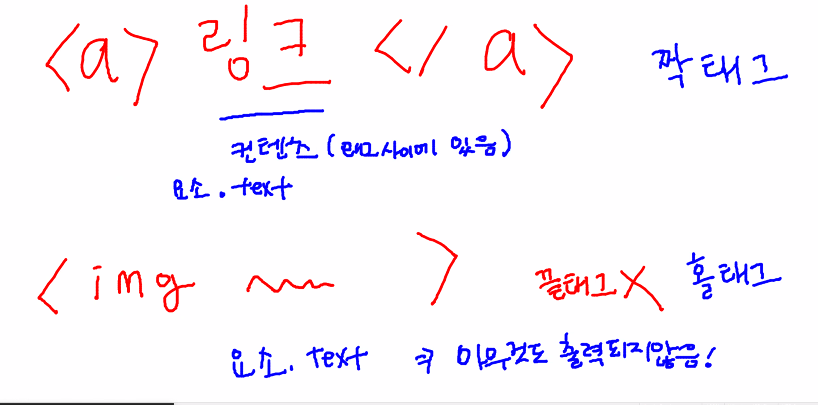

In [48]:
len(img)

18

In [49]:
# 수집한 순수한 이미지 src만을 담아주자
img_list = []
for i in img:
    img_list.append(i['src'])

In [52]:
# 우리가 필요한 이미지의 경로데이터만 담김
img_list

['https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000101.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000201.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000301.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000302.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000303.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000401.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000501.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000601.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000602.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000603.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000604.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000701.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000801.png',
 'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000901.png',
 'https://data1.pokemonkorea.co.kr/newdata/poked

- urlretrieve 라이브러리를 활용하여 이미지 경로 -> 이미지 파일로 저장
- urlretrieve : 이미지경로를 파일로 변환시켜주는 라이브러리
    - urlretrieve( "변경할이미지의주소" , "저장할위치\\파일이름.확장자" )

In [56]:
# 첫번 쨰 포켓몬만 이미지로 저장
urlretrieve(img_list[0], "C:\\Users\\SMHRD\\Desktop\\workspace\\pokemonImg\\pokemon1.jpg")

('C:\\Users\\SMHRD\\Desktop\\workspace\\pokemonImg\\pokemon1.jpg',
 <http.client.HTTPMessage at 0x25ad42c1ca0>)

In [58]:
# 리스트에 담긴 모든 포멧몬을 파일로 저장해보자
for i in range(len(img_list)):
    urlretrieve(img_list[i], f"C:\\Users\\SMHRD\\Desktop\\workspace\\pokemonImg\\pokemon{i}.jpg")


### 100마리의 포켓몬 수집
- bs객체화 진행할 때 현재 로딩된 페이지의 정보만 객체화 진행
- 로딩되지 않은 페이지에 대해 스크롤을 진행해보자!

In [ ]:
# 키보드를 아래로 내리는 방법
# 아래방향키 : 쪼금 내려감
# 스페이스바
# page dowm : 스크롤바 만큼 내려간다
# end : 페이지의 가장 아래로 내려감

# search = driver.find_element(By.ID,"is-scroll")
# search.send_keys(Keys.PAGE_DOWN)

In [82]:
body = driver.find_element(By.CSS_SELECTOR,"body")
body.send_keys(Keys.END)

In [ ]:
while True:
    try:
        body.send_keys(Keys.END)
    except:
        print("출력 완료")

In [93]:
try:
    os.mkdir("C:\\Users\\SMHRD\\Desktop\\workspace\\pokemonImg")
except:
    print("이미 존재하는 폴더입니다.")

driver = wb.Chrome()
driver.get("https://www.pokemonkorea.co.kr/pokedex#pokedex_1")
time.sleep(1)

body = driver.find_element(By.CSS_SELECTOR,"body")
for i in range(10):
    try:
        time.sleep(0.5)
        body.send_keys(Keys.END)
    except:
        print("Key down 완료")
        break

#^^ 반드시 페이지 로딩 후 bs객체화 진행!!
soup = bs(driver.page_source, "lxml")

img = soup.select("div.tumb-wrp>img")
img_list = []
for i in img:
    img_list.append(i['src'])

for i in tq(range(len(img_list))):
    time.sleep(1)
    urlretrieve(img_list[i], f"C:\\Users\\SMHRD\\Desktop\\workspace\\pokemonImg\\pokemon{i}.jpg")

driver.quit()


C:\Users\SMHRD\AppData\Local\Temp\ipykernel_16380\3575538939.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tq(range(len(img_list))):


  0%|          | 0/180 [00:00<?, ?it/s]

In [88]:
soup = bs(driver.page_source, "lxml")

In [91]:
img = soup.select("div.tumb-wrp>img")
img_list = []
for i in img:
    img_list.append(i['src'])

KeyboardInterrupt: 

In [ ]:
len(img_list)

In [92]:
driver.quit()

In [81]:
print(soup.select("div.bx-txt")[0].text.strip())

No.0001 이상해씨

						
풀
독
